---
title: "Risk Factors of Lung Cancer Mortality: Assumption and Verification"
description: "Cancer data research"
author: "Weikeng Yang"
date: "2023-07-29"
date modified: "2023-08-04"
categories: [cancer, data, analysis]
---


![What is cancer? | MD Anderson Cancer Center](https://www.mdanderson.org/images/publications/cancerwise/Generics/cancer-metastasis-cancerwise.jpg)
Image Creator: Jordan T. Pietz MA, CMI 
Copyright: © 2020 The University of Texas MD Anderson Cancer Center


# Introduction


This project aims to investigate potential factors that affect the cancer death rate. Based on the baseline datasets found, the project would mainly take the state which has the highest cancer mortality as the main comparison sample, focusing on the field of education, air quality, aging population, and race differences to investigate their correlation to the cancer death rate. 


## Data Description and Source 
| Dataset                                                   | Description                                                  | Organization & Link                                          |
| --------------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Cancer Death Rate in Each State (2007-2013)               | The baseline dataset for this project. Information about the rates of cancer deaths in each state is reported. The data shows the total rate as well as rates based on sex, age, and race. Rates are also shown for three specific kinds of cancer: breast cancer, colorectal cancer, and lung cancer. The data is collected from 2007-2013. | [CORGIS CANCER](https://corgis-edu.github.io/corgis/csv/cancer/) |
| Highest Education Level Rate By State (2008-2012)        | Proportion of Educational attainment for adults age 25 and older for the U.S., States, and counties. ERS compiles the latest statistics on these measures. | [USDA, Economic Research Service using data from U.S. Department of Commerce](https://www.ers.usda.gov/data-products/county-level-data-sets/) |
| Air Quality Index Data Annual by Country (2007-2013)      | Data comes from EPA’s Air Quality System (AQS). It collects daily data and shows the annual statistics for AQI (max, number of values in each category, etc.) by CBSA (metro area) or county. | [EPA - United States Environmental Protection Agency](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual) |
| Demographics include population breakdowns by age in U.S. | Population and demographic data on are based on analysis of the Census Bureau’s American Community Survey (ACS), 1-Year Estimates. | [KFF - The independent source for health policy research, polling, and news.](https://www.kff.org/state-category/demographics-and-the-economy/population/) |


## Motivations: 

Cancer, is a main health problem for us to care about. By examining cancer mortality based on sex, age, and race, we can gain insights into how different demographic groups may be affected by cancer and the possible risk factors. This can help identify populations that are particularly vulnerable or may require targeted interventions. To understand the risk factors, we may help those people who we care about to avoid cancer. 


## Main Research Questions:

- Which types of cancer have the highest death rates overall, and how does the rate vary by state?
- Are there any correlations between cancer death rates and other factors, such as educational level? Any others?
- Any measures that can reduce the cancer death rate?

# Methods
This section is mainly about 
- Data preprocessing
    - Importing
    - Cleaning
    - Organizing 
    - Merging
- Dataset explanation
- Analytical ideas
- Exploratory data visualizations

Data preparation and overview would be necessary for us to utilize the dataset and the direction to utilize them.

## Library Imports
The package is pre-installed for you if you access it through the binder.

Below are the Python libraries that this project has used. Execute the following cell for important imports.

In [33]:
from bs4 import BeautifulSoup
from pathlib import Path
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

## Data Preparation Steps

This section is for data preprocessing, data summary, and data cleaning if needed.

### 1. Cancer Dataset

Use `pd.read_csv()` to read data stored at the download link for the CSV file; assign the resulting data frame to a variable `df_cancer`.

In [34]:
# Retrieve the html code of the CORGIS webpage
# Read dataset 1
# reference: Assignment 4
url = "https://corgis-edu.github.io/corgis/csv/"
response = requests.get(url)
html = response.text
status = response.status_code
soup = BeautifulSoup(html, "html.parser")
h3_contents = soup.find_all('h3')
h3_list = []
for h3_tag in h3_contents:
  h3_list.append(h3_tag.text)
def pdcorgis(a):
  try:
    dataset = a.lower()
    dataset = dataset.replace(' ', '_')
    dataset_url = f"https://corgis-edu.github.io/corgis/csv/{dataset}/"
    response = requests.get(dataset_url)
    html_code = response.text
    status = response.status_code
    soup = BeautifulSoup(html_code, 'html.parser')
    links = soup.find_all('a')
    download_link = None
    for i in links: 
      if i.has_attr('download'):
        download_link = i['href']
        break 
    if download_link:
      csv_url = f"https://corgis-edu.github.io/corgis/csv/{dataset}/{download_link}"
      corgisdf = pd.read_csv(csv_url)
      return corgisdf
    else:
      return None
  except:
    print("An exception ocurred")
# the dataframe we need for the research
df_cancer = pdcorgis("Cancer")

#### Overciew

In [35]:
df_cancer.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,102.9,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,50.3,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,47.0,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,106.5,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,36.8,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3


Metadata Note: Rate per 100,000 Population

In [36]:
df_cancer.describe()

,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,Rates.Age and Sex.18 - 45.Female,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
count,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,190.656863,78723.725490,4.240151e+07,2.119608,14.764706,197.576471,980.949020,1.727451,2.033333,16.013725,...,64.825490,224.668627,354.956863,48.158824,49.341176,44.056863,44.500000,19.323529,27.309804,16.184314
std,28.592155,80861.292676,4.784244e+07,0.502004,2.204343,31.261040,75.189556,0.846186,0.931808,2.530219,...,21.288737,33.313394,69.938477,9.446125,9.274183,20.517283,21.431435,10.427801,26.435236,8.041079
min,98.500000,6361.000000,3.931624e+06,0.000000,10.000000,132.300000,735.800000,0.000000,0.000000,10.300000,...,26.000000,92.700000,153.200000,20.400000,20.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,20631.000000,1.186991e+07,2.050000,13.350000,175.000000,943.550000,1.750000,2.050000,14.150000,...,48.950000,209.550000,313.300000,42.750000,43.700000,38.150000,39.950000,18.350000,4.450000,13.700000
50%,196.100000,54930.000000,3.034806e+07,2.200000,14.600000,189.300000,999.600000,2.000000,2.300000,16.000000,...,59.700000,225.800000,342.600000,48.100000,48.800000,47.000000,48.600000,22.200000,20.900000,18.100000
75%,210.750000,93328.000000,4.650326e+07,2.400000,16.250000,217.850000,1031.450000,2.200000,2.500000,17.700000,...,77.600000,248.150000,391.000000,54.500000,54.950000,60.000000,60.350000,25.500000,44.250000,20.450000
max,254.600000,393980.000000,2.611357e+08,2.700000,20.300000,263.900000,1110.200000,2.900000,3.200000,22.800000,...,112.600000,298.300000,519.100000,71.500000,71.900000,73.200000,73.600000,33.900000,87.500000,35.200000


In [37]:
for col in df_cancer.describe():
    if 'Age' in col:
        print(col)

Rates.Age.< 18
Rates.Age.18-45
Rates.Age.45-64
Rates.Age.> 64
Rates.Age and Sex.< 18.Female
Rates.Age and Sex.< 18.Male
Rates.Age and Sex.18 - 45.Female
Rates.Age and Sex.18 - 45.Male
Rates.Age and Sex.45 - 64.Female
Rates.Age and Sex.45 - 64.Male
Rates.Age and Sex.> 64.Female
Rates.Age and Sex.> 64.Male
Types.Breast.Age.18 - 44
Types.Breast.Age.45 - 64
Types.Breast.Age.> 64
Types.Colorectal.Age and Sex.Female.18 - 44
Types.Colorectal.Age and Sex.Male.18 - 44
Types.Colorectal.Age and Sex.Female.45 - 64
Types.Colorectal.Age and Sex.Male.45 - 64
Types.Colorectal.Age and Sex.Female.> 64
Types.Colorectal.Age and Sex.Male.> 64
Types.Lung.Age and Sex.Female.18 - 44
Types.Lung.Age and Sex.Male.18 - 44
Types.Lung.Age and Sex.Female.45 - 64
Types.Lung.Age and Sex.Male.45 - 64
Types.Lung.Age and Sex.Female.> 64
Types.Lung.Age and Sex.Male.> 64


We could see that there are mainly 4 age groups of metadata in this dataset. However, the metadata names are not canonical and not organized well, and there are absences of metadata. For example, the data in the columns on Breast Cancer didn't collect the data by sex, compared to colorectal and lung cancer. What is more, for the three types of cancer that the dataset recorded, the data for ages below 18 are not collected.

This may be because cancer mortality is relatively low in people under the age of 18 and might be hard to access the exact value, and data collectors believe that this particular breakdown of cancer mortality does not have much impact on the analysis of the overall data.

#### Data Cleaning

use `isnull()` to detect missing values for an array-like object.

In [38]:
# examining missing values
print("Missing values distribution: ")
print(df_cancer.isnull().mean())

Missing values distribution: 
State                                 0.0
Total.Rate                            0.0
Total.Number                          0.0
Total.Population                      0.0
Rates.Age.< 18                        0.0
                                     ... 
Types.Lung.Race.Black                 0.0
Types.Lung.Race.Black non-Hispanic    0.0
Types.Lung.Race.Asian                 0.0
Types.Lung.Race.Indigenous            0.0
Types.Lung.Race.Hispanic              0.0
Length: 75, dtype: float64


No missing values found. 

### 2. Educational Attainment Dataset
Read dataset file as dataframe:

In [39]:
# Read dataset 2
df_edu=pd.read_csv('./data/education_level_2008_2012.csv')

#### Overview

In [40]:
df_edu.head()

,State,Completing college,Completing some college,Completing high school only,Not completing high school
0,United States,0.285,0.290,0.282,0.143
1,Alabama,0.223,0.290,0.313,0.174
2,Alaska,0.275,0.370,0.271,0.084
3,Arizona,0.266,0.344,0.244,0.146
4,Arkansas,0.198,0.284,0.351,0.167


#### Data Cleaning

In [41]:
# examining missing values
print("Missing values distribution: ")
print(df_edu.isnull().mean())

Missing values distribution: 
State                          0.0
Completing college             0.0
Completing some college        0.0
Completing high school only    0.0
Not completing high school     0.0
dtype: float64


### 3. Median AQI Datasets

Read the data frame, and perform data pre-processing and data cleaning.

Since the data we need would be the column of median AQI merely, we will first use dict to store the average annual data for each state in each year, null values are skipped, in order to avoid them affecting the calculation result.
After iteration over, the dict will consist of state name as the key and lists of annual median AQI as the value. Further, calculate the average value for each list to get an average median AQI in the time interval and take the result to update the previous value (which is a list) of the dict. 

Finally, we get a dict that consists of the state name as the key and the average median AQI value as the value. 
In the next section, this dict would be merged into the cancer dataset.

There are 7 datasets we need to iterate, use `pathlib` library to search for files that match a specific file pattern or name. 
(Note: `os` and `glob` library cannot be used in Binder, only `pathlib` is acceptable)

In [42]:
data_dir = Path('./data/airdata/')
csv_files = data_dir.glob('*.csv')

state_aqi_avg_dict = {}

for csv_file in csv_files:
    df_aqi = pd.read_csv(csv_file)
    df_aqi = df_aqi[(df_aqi['Median AQI'] != 0) & (df_aqi['Median AQI'].notnull())]
    state_aqi = df_aqi.groupby('State')['Median AQI'].mean().to_dict()
    state_aqi_avg_dict.update(state_aqi)

#### Overview
Quick overview for this dataset, and as stated above, we need the column of median AQI merely, and data cleaning has been done while the reading process.

In [43]:
df_aqi.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2010,274,188,80,6,0,0,0,150,71,43,0,0,192,82,0
1,Alabama,Clay,2010,113,79,34,0,0,0,0,86,60,42,0,0,0,113,0
2,Alabama,Colbert,2010,355,208,146,1,0,0,0,105,67,47,0,0,114,241,0
3,Alabama,DeKalb,2010,358,248,106,4,0,0,0,101,74,43,0,0,303,55,0
4,Alabama,Elmore,2010,241,181,55,5,0,0,0,112,71,43,0,0,241,0,0


#### Data Cleaning

The data cleaning has been done during the reading process. No need to detect missing values and cleaning at this point.

### 4. Age Distribution Dataset
Read dataset file as dataframe:

In [44]:
# Read dataset 4
df_age = pd.read_csv('./data/population_distribution_age.csv')

#### Overview

In [45]:
df_age.head()

,State,2008,2009,2010,2011,2012,2013,Avg_Rate
0,United States,0.1260,0.1272,0.1301,0.1323,0.1370,0.1410,0.132267
1,Alabama,0.1353,0.1369,0.1375,0.1396,0.1442,0.1490,0.140417
2,Alaska,0.0735,0.0766,0.0769,0.0830,0.0845,0.0941,0.081433
3,Arizona,0.1337,0.1320,0.1399,0.1438,0.1506,0.1554,0.142567
4,Arkansas,0.1409,0.1399,0.1431,0.1447,0.1490,0.1526,0.145033


#### Data Cleaning

In [46]:
# examining missing values
print("Missing values distribution: ")
print(df_age.isnull().mean())

Missing values distribution: 
State       0.101449
2008        0.231884
2009        0.231884
2010        0.231884
2011        0.231884
2012        0.231884
2013        0.231884
Avg_Rate    0.231884
dtype: float64


There is a 16-row footer note at the bottom of the CSV files, to solve this, use `skip_blank_lines=True` to skip the blank rows and `skipfooter=16` to skip the footer rows while reading the dataset.

In [47]:
# Re-read dataset 4
df_age = pd.read_csv('./data/population_distribution_age.csv', skipfooter=16, engine='python' )
# examining missing values
print(df_age.isnull().mean())

State       0.0
2008        0.0
2009        0.0
2010        0.0
2011        0.0
2012        0.0
2013        0.0
Avg_Rate    0.0
dtype: float64


Now, the data preparations for all the datasets is completed.

We will start to explore the cancer dataset.

## Initial Exploration

### Understand The Data

We will first have a data summary for the cancer dataset, which is directly relevant to the topic of the project.

For understanding the data, using the **5W2H** method could help us to arrive at the following analytical ideas:

| 5W2H      | Analytical Ideas                                             |
| --------- | ------------------------------------------------------------ |
| What?     | Analyze the total cancer mortality for each state and the death rate for specific types of cancer. We can also compare differences in cancer mortality by gender, age, and race. |
| Why?      | Analyzing cancer mortality can help us understand the impact of different factors on cancer risk and death. By identifying high-risk groups and possible risk factors, we can take preventive measures and provide targeted medical care. |
| Where?    | Compare cancer death rates between different states to see if there are geographic differences. We can also determine which states have higher or lower cancer death rates. |
| When?     | The time range of the data set is 2007 to 2013, however, the dataset shows average value in this time interval merely. Thus, we should also care about the time interval while seeking the associated datasets. |
| Who?      | Analyze the differences in cancer mortality among people of different genders, ages, and ethnicities. This can help to understand whether specific populations are at higher risk. |
| How?      | Use statistical analysis methods to compare cancer mortality rates between different groups and look for correlations and trends. Alternatively, use data visualization to help better present and interpret data. |
| How much? | Look at the extent to which different factors contribute to cancer mortality. By calculating differences and relative risks, we can assess the extent to which different factors contribute to cancer mortality. |



A map visualization would be helpful to identify the state and locate the problem at a geographical level. Initially, we will use the map to have a basic geographical overview and to identify the state sample we need for the project.  

In [48]:
# reference for this:https://gist.github.com/rogerallen/1583593 (A Python Dictionary to translate US States to Two letter codes)
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
df_cancer['Abbreviation'] = df_cancer['State'].map(us_state_to_abbrev)
# Create the choropleth map
fig = px.choropleth(df_cancer,
                    locations=df_cancer['Abbreviation'],
                    locationmode='USA-states',  # set the location mode to 'country names' for USA states
                    color='Total.Rate',  # the variable to be represented by color
                    hover_name='State',  # the values to be displayed when hovering over each state
                    scope='usa',  # set the scope to 'usa' for United States map
                    title='Cancer Mortality by State 2007-2013')

# Show the map
fig.show()

Click the color block could see the numerical data for the region.

Geographically, the map helps identify regions with higher or lower cancer mortality levels, revealing patterns and contrasts. There are geographical differences in lung cancer mortality. Cancer death rate is higher in the eastern states than in the western states overall. 

And obviously, West Virginia is the state which has the highest cancer mortality, and on the other hand, Utah has the lowest cancer mortality.

### Q1: Which types of cancer have the highest death rates overall?

We are going to use a pie chart to analyze the proportion of different types of cancer mortality in this dataset to investigate which types of cancer have the highest death rates overall. The value on each slice represents the average rates of each cancer type for all states.

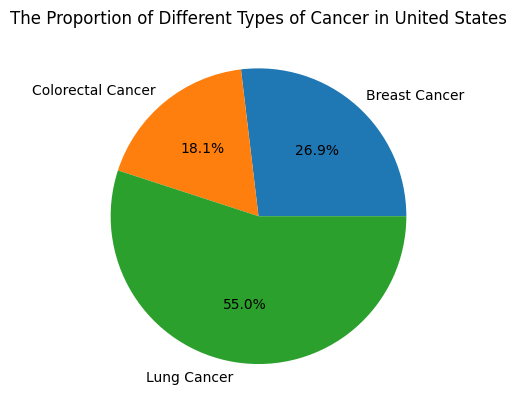

In [49]:
breast_total = df_cancer['Types.Breast.Total'].mean()
colorectal_total = df_cancer['Types.Colorectal.Total'].mean()
lung_total = df_cancer['Types.Lung.Total'].mean()
cancer_counts = [breast_total, colorectal_total, lung_total]
cancer_labels = ['Breast Cancer', 'Colorectal Cancer', 'Lung Cancer']
# create the pie chart
plt.pie(cancer_counts, labels=cancer_labels, autopct='%1.1f%%')
plt.title('The Proportion of Different Types of Cancer in United States')
plt.show()

We could see from the above figures that, lung cancer is the main cancer type that leads to death among these three types of cancer in the United States. It answered the first research question, would discuss further in the next section.

The map visualization above already indicates the approximate ranking of cancer mortality to some extend, would it be the same for lung cancer? 

Use a bar plot to visualize the comparison to see the ranking:

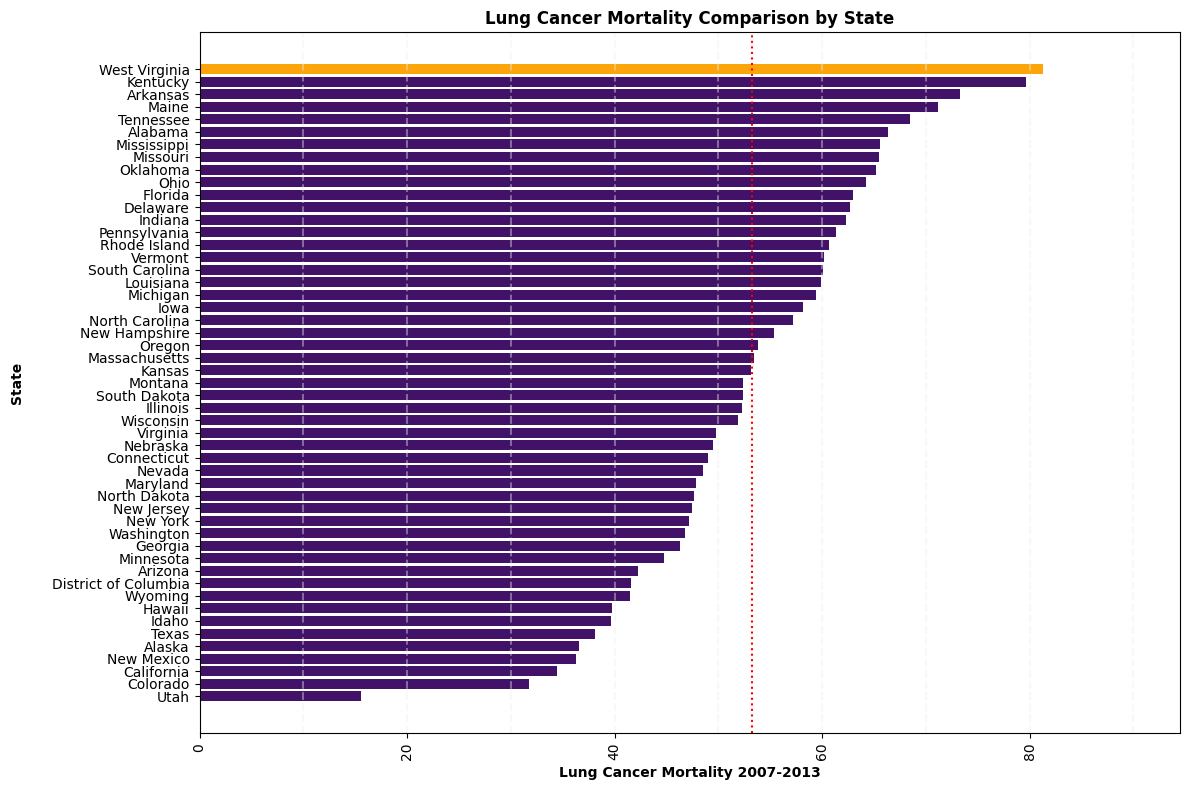

In [50]:
states = df_cancer["State"]
total_rates = df_cancer["Types.Lung.Total"]

# Sort the states and total_rates in descending order
sorted_indices = np.argsort(total_rates)
sorted_states = states[sorted_indices]
sorted_total_rates = total_rates[sorted_indices]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Find the index of the highest bar
highest_index = np.argmax(sorted_total_rates)

# Set colors for bars
colors = ['#421168'] * len(sorted_states)
colors[highest_index] = '#fca50a'

ax.barh(sorted_states, sorted_total_rates, color=colors)
ax.set_xlabel("Lung Cancer Mortality 2007-2013", weight='bold', size=10)
ax.set_ylabel("State", labelpad=20, weight='bold', size=10)
ax.set_title("Lung Cancer Mortality Comparison by State", weight='bold', size=12)
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1) 
plt.axvline(x=np.nanmean(total_rates), color='red', ls='dotted')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

The dotted line means the average cancer rate for states. 
As the above figure shows, Utah is the state which has the lowest lung cancer death rate. And West Virginia is the state with the highest lung cancer death rate. This result is the same as what the map visualization has shown.

In order to reduce the error by reducing the diversity of the data and to take into account that the risk factors of different cancers may be different, the subsequent analysis will focus on lung cancer only. And For the analysis part, we are going to choose West Virginia as a basic sample for this study to investigate why its lung cancer rate was the highest.  


Would the cancer rate be different for different ages? I believe no one would say no. But a data visualization can help us to confirm this. Next, we are going to display a line plot to analyze trends in lung cancer rates across age groups in the United States. It takes the average rate for states as the y-axis. 

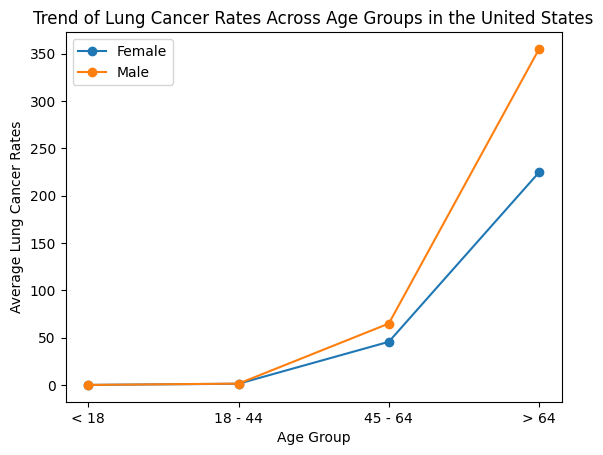

In [51]:
age_groups = ['< 18', '18 - 44', '45 - 64', '> 64']

lung_rates_female = [
  0,
  df_cancer['Types.Lung.Age and Sex.Female.18 - 44'].mean(),
  df_cancer['Types.Lung.Age and Sex.Female.45 - 64'].mean(),
  df_cancer['Types.Lung.Age and Sex.Female.> 64'].mean()
]
lung_rates_male = [
  0,
  df_cancer['Types.Lung.Age and Sex.Male.18 - 44'].mean(),
  df_cancer['Types.Lung.Age and Sex.Male.45 - 64'].mean(),
  df_cancer['Types.Lung.Age and Sex.Male.> 64'].mean()
]
plt.plot(age_groups, lung_rates_female, marker='o', label='Female')
plt.plot(age_groups, lung_rates_male, marker='o', label='Male')

plt.xlabel('Age Group')
plt.ylabel('Average Lung Cancer Rates')
plt.title('Trend of Lung Cancer Rates Across Age Groups in the United States')
plt.legend()

plt.show()

From the above figure, we could see the line rapidly increased in the elderly group (> 64) for both females and males. It indicates that age supports the concept that lung cancer is a disease largely associated with aging; so the longer one lives, the greater that person's risk for developing the disease. 

We also can observe that the dataset does not have data for the age group under 18, the potential reason might be that the access to collect this data was difficult during 2007-2013 and the rate is extremely small. To make the plots "good" and more comprehensive, 0 is assigned to this age group in this plot. We will discuss more details about this data absence in the section of Discussion.

And from the plot, we also notice that the trend for males is more rapid than for females, why?

# Analysis & Results

### Q2: What Would be The Risk Factors of Cancer Mortality?

There are some assumptions for the potential factors that affect lung cancer rate and they would be further topics that for the project to analyze:
   - Educational Attainment
   - Environment - Air Quality
   - Population Distribution by Age
   - Race / Ethnicty

## Assume 1: Education

We assume that with a higher percent of highly-educated people, the cancer death rate might decrease. 

### Data Exploration

We will use the dataset `df_edu` to further analyze. 

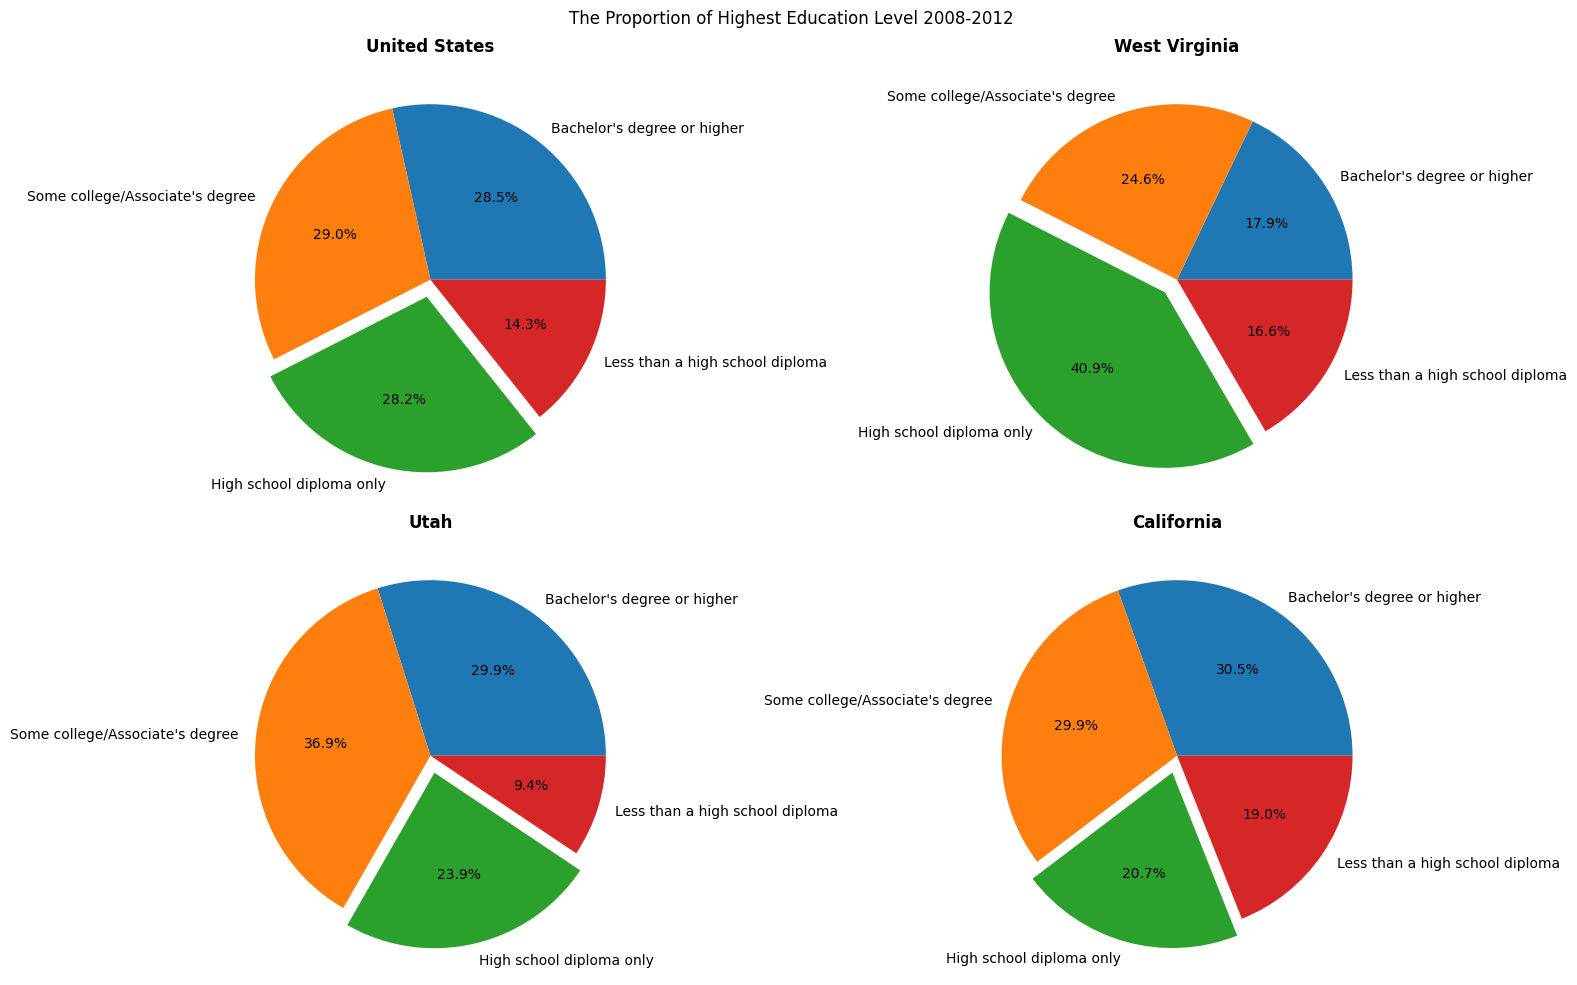

In [52]:
edu_labels = ["Bachelor's degree or higher", 
              "Some college/Associate's degree", 
              "High school diploma only", 
              "Less than a high school diploma"]
# states sample
states = ['United States', 'West Virginia', 'Utah', 'California']
edu_data = {}

# Store the data in a dictionary
for state in states:
  data = df_edu[df_edu['State'] == state]
  comp_college = data['Completing college'].sum()
  comp_some_college = data['Completing some college'].sum()
  comp_high = data['Completing high school only'].sum()
  not_comp_high = data['Not completing high school'].sum()
  edu_counts = [comp_college, comp_some_college, comp_high, not_comp_high]
  edu_data[state] = edu_counts

fig, axes = plt.subplots(nrows=int(len(states)/2), ncols=2, figsize=(15, 10))

# Iterate over the states
for i, (state, ax) in enumerate(zip(states, axes.flatten())):
  edu_counts = edu_data[state]
  explode = [0 if label != "High school diploma only" else 0.1 for label in edu_labels]
  ax.pie(edu_counts, labels=edu_labels, autopct='%1.1f%%', startangle=0, explode=explode)
  ax.set_title(state, weight='bold')

fig.suptitle('The Proportion of Highest Education Level 2008-2012')
fig.tight_layout()

plt.show()

From the above pie charts, we can see that the percentage of 'Hign school diploma only' in West Virginia is higher than both the United States (avg) and Utah (the state that has the lowest cancer death rate), and California as well (the 3rd lowest cancer death rate state, the state we live).

To further compare the education attainment ratio in West Virginia to other states, a stacked bar chart would be helpful.

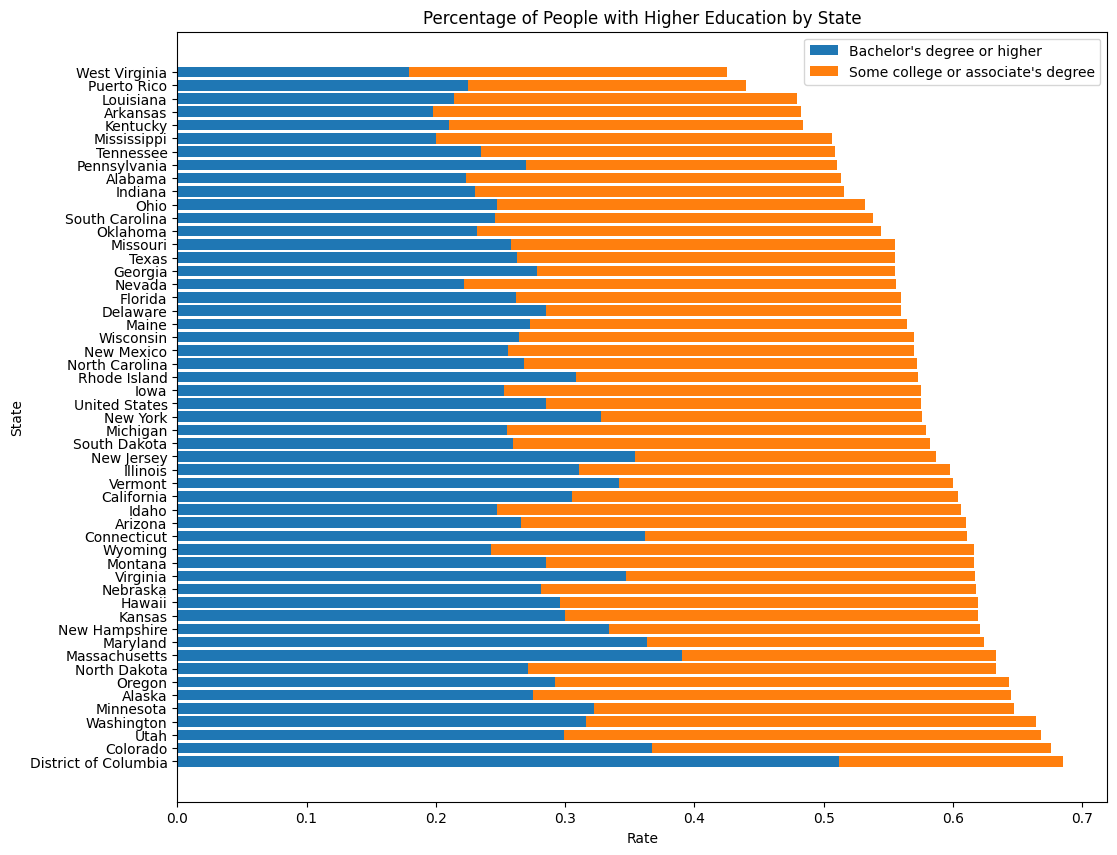

In [53]:
df_edu['Completing college + Completing some college'] = df_edu['Completing college'] + df_edu['Completing some college']
df_edu = df_edu.sort_values('Completing college + Completing some college', ascending = False)

plt.figure(figsize=(12, 10))

# plot the stacked bar plot
plt.barh(df_edu['State'], df_edu['Completing college'], label="Bachelor's degree or higher")
plt.barh(df_edu['State'], df_edu['Completing some college'], 
         left=df_edu['Completing college'], label="Some college or associate's degree")
# add labels and title
plt.ylabel('State')
plt.xlabel('Rate')
plt.title('Percentage of People with Higher Education by State')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the above figure, we can see the percentage of people with higher education in West Virginia is also the lowest in the United States. Its ranking among the states is the same as its ranking of cancer death rate.
Therefore, the correlation between education attainment and cancer death rate could be identified from the combined ranking.
However, we still need to identify if this factor also applies to other states.


To further explore if this factor also affects other states, we need scatter plots to make a regression analysis. The plots consist of two sub-plots. They take the lung cancer death rate as the dependent variable (y-axis), and take the highly-educated level and non-highly-educated level rate as the independent variables (x-axis), the dots mean each state in the U.S.

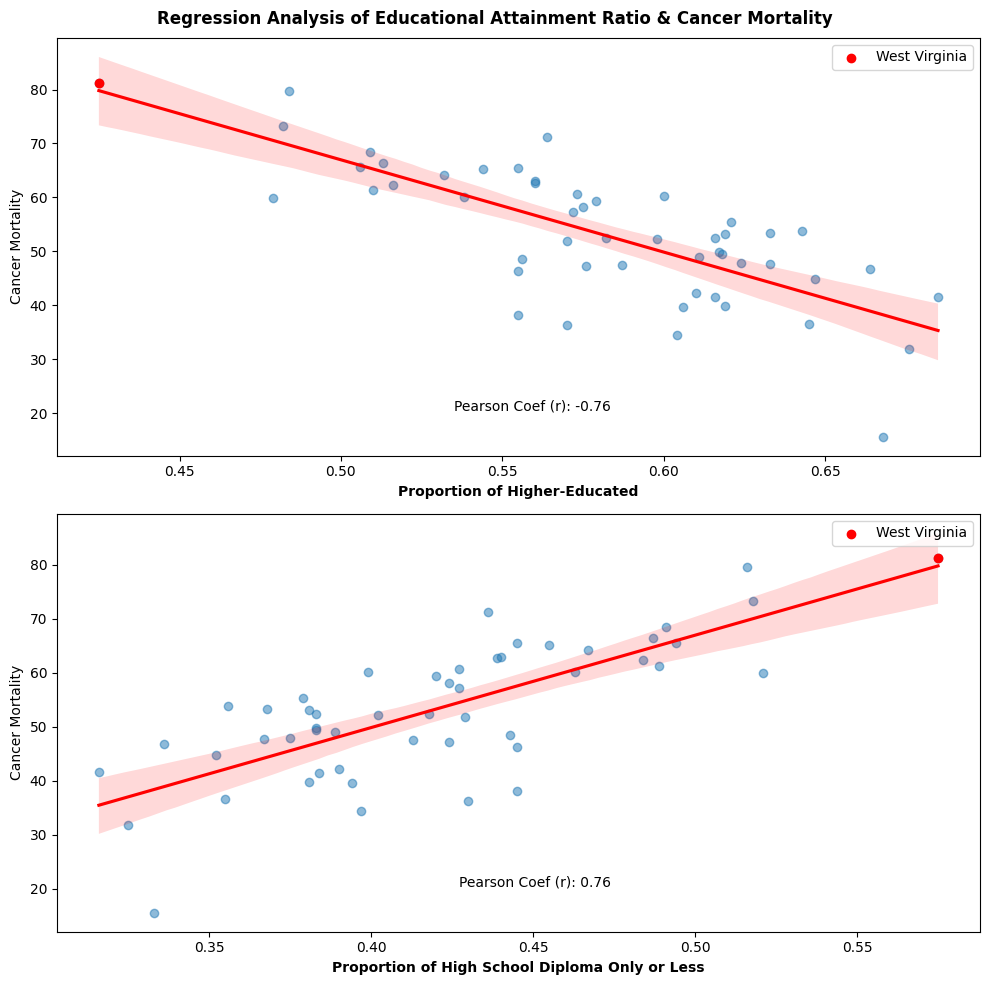

In [54]:
cancer_rate = 'Types.Lung.Total'
# Merge the dataframes
df_merged = pd.merge(df_edu, df_cancer, on='State')

# calculate higher-educated rate and high school diploma or less rate
df_merged['Proportion of Higher-Educated'] = df_merged['Completing college'] + df_merged['Completing some college']
df_merged['Proportion of High School Diploma Only or Less'] = df_merged['Completing high school only'] + df_merged['Not completing high school']

# Create scatter plots with regression line
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Iterate over the sub-plots
for ax, column in zip(axes, ['Proportion of Higher-Educated', 'Proportion of High School Diploma Only or Less']):
  sns.regplot(x=column, y=cancer_rate, data=df_merged, ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'})
  ax.set_xlabel(column, weight='bold', size=10)
  ax.set_ylabel('Cancer Mortality')
    
  # calculate Pearson correlation coefficient
  correlation = df_merged[column].corr(df_merged[cancer_rate])
    
  # Highlight and label data point for West Virginia
  west_virginia = df_merged[df_merged['State'] == 'West Virginia']
  ax.scatter(west_virginia[column], west_virginia[cancer_rate], color='red', label='West Virginia')
    
  # add Pearson correlation coefficient as text label
  ax.text(0.6, 0.1, f'Pearson Coef (r): {correlation:.2f}', transform=ax.transAxes, fontsize=10, ha='right', va='bottom')
  ax.legend()

# Adjust layout
plt.suptitle("Regression Analysis of Educational Attainment Ratio & Cancer Mortality", weight='bold', size=12)
plt.tight_layout()

# Show the plot
plt.show()

`dataframe.corr()` outputs the pairwise Pearson correlation (a value of ± 1) of these two variables. 

Although interpretations of the relationship strength (also known as effect size) vary between disciplines, the table below gives general rules of thumb 
([Ref Link](https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=The%20Pearson%20correlation%20coefficient%20(r,the%20relationship%20between%20two%20variables.)
)).

| Pearson correlation coefficient (*r*) value | Strength | Direction |
| :------------------------------------------ | :------- | :-------- |
| Greater than .5                             | Strong   | Positive  |
| Between .3 and .5                           | Moderate | Positive  |
| Between 0 and .3                            | Weak     | Positive  |
| 0                                           | None     | None      |
| Between 0 and –.3                           | Weak     | Negative  |
| Between –.3 and –.5                         | Moderate | Negative  |
| Less than –.5                               | Strong   | Negative  |


As the Pearson coefficient of correlation r (0.76) we got from the plot and table shown above, we can conclude that there is a strong negative correlation between the perception of higher-educated people and cancer mortality. And as well as a strong positive correlation between the perception of people who have high school diplomas only or less and cancer death rate.  
That is, as the proportion of highly-educated people increases, the cancer mortality can decrease. 


## Assume 2: Environment - Air Quality Index
We are going to analyze the correlation between environment and cancer mortality. 

We will analyze it through calculate the correlation coefficient between the median Air Quality Index (AQI) for states from 2007-2013. 

[Explaination for AQI](https://www.airnow.gov/aqi/aqi-basics/):
> Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air >pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, >while an AQI value over 300 represents hazardous air quality.
>
>For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of >the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are >generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain >sensitive groups of people, then for everyone as AQI values get higher.


### Regression Analysis

The dataset `df_aqi` has been pre-processed in the last section. Merge the data to `df_cancer`:

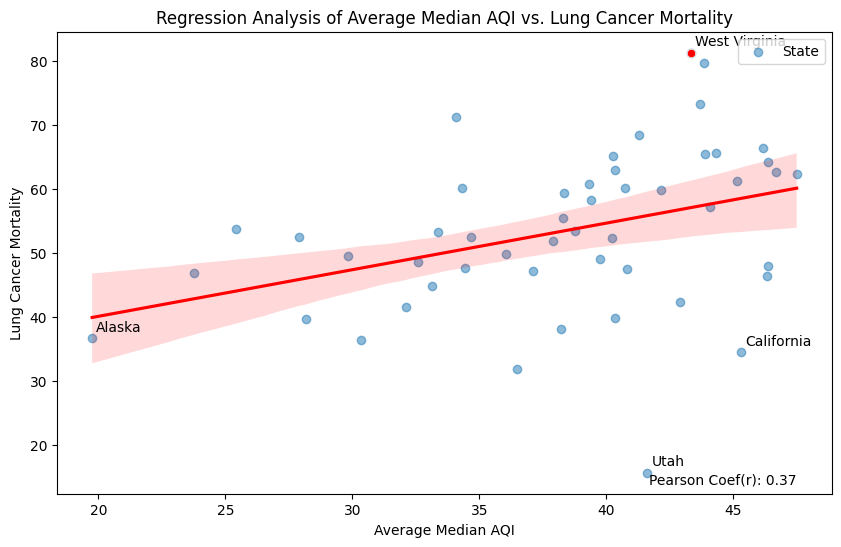

In [55]:
 # Merge the dataframes
merged_df = pd.DataFrame({'State': list(state_aqi_avg_dict.keys()),
                          'Avg Median AQI': list(state_aqi_avg_dict.values())})
merged_df = merged_df.merge(df_cancer, on='State')

cancer_rate = 'Types.Lung.Total'
pearson_coef = merged_df['Avg Median AQI'].corr(merged_df[f"{cancer_rate}"])

plt.figure(figsize=(10, 6))
sns.regplot(x='Avg Median AQI', y=f"{cancer_rate}", data=merged_df, line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, label='State')

text = f"Pearson Coef(r): {pearson_coef:.2f}"
plt.text(merged_df['Avg Median AQI'].max(), merged_df[f"{cancer_rate}"].min(), text, verticalalignment="top", horizontalalignment="right")
plt.xlabel('Average Median AQI')
plt.ylabel('Lung Cancer Mortality')
plt.title('Regression Analysis of Average Median AQI vs. Lung Cancer Mortality')

# Highlight the data point for West Virginia
west_virginia = merged_df.loc[merged_df['State'] == 'West Virginia']
sns.scatterplot(data=west_virginia, x='Avg Median AQI', y=f"{cancer_rate}", color='red')

# Highlight the state labels for specified states
highlight_states = ['West Virginia', 'Utah', 'Alaska', 'California']
for i, state in enumerate(merged_df['State']):
  if state in highlight_states:
    plt.annotate(state, (merged_df['Avg Median AQI'][i], merged_df[f"{cancer_rate}"][i]), textcoords='offset points', xytext=(3,5))
        
plt.legend()
plt.show()

From the above figure, we can see that these two variables have a positive association because as median AQI by state increases, so does the cancer death rate by state. However, the relationship that the plot has shown is weak.

There are many states that have poorer air quality than west virginia, such as California and Utah, but their cancer death rate is much lower than West Virginia.

Through the value of `r` we have (0.19) and the table above, unexpectedly, the cancer death rate by the state was positively correlated to the median AQI (air quality) index weakly.
There might be some possible reasons for this:
- Overall, the values of median AQI for all states are below 50, which is considered satisfactory and healthy air quality through EPA's explanation.  Therefore, it would be difficult to monitor whether air quality affects cancer mortality.  

- Some other potential influences: For example, smoking rates, eating habits, genetics, population distribution by age or race, etc. 

Therefore, the influence of air quality would be difficult to detect in the United States. To further investigate it, should expand the dataset to the foreign region which has unhealthy air quality. 

## Assume 3: Population Distribution by Age

Similarly, we will use regression analysis to Identify if population distribution by age is a risk factor for lung cancer mortality. We will use the data frame `df_age` which collects the data of the annual population proportion of elderly in each state from 2008-2013. The average rate in this time interval would be taken as the x-axis, the dependable variable. And the lung cancer death rate would be still taken as the y-axis. 

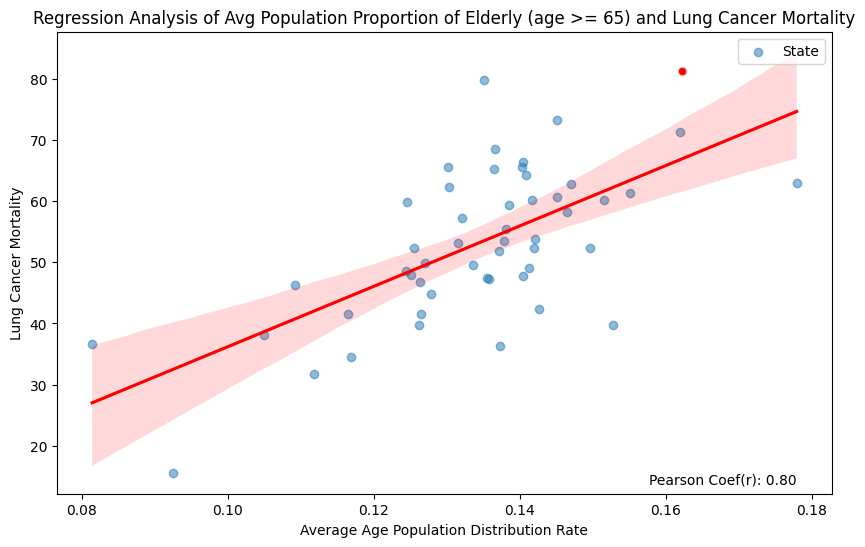

In [56]:
# Merge the dataframes
cancer_rate = 'Types.Lung.Total'
merged_df = pd.merge(df_age, df_cancer, on='State')

# create the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='Avg_Rate', y=f"{cancer_rate}", line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, label='State')
plt.xlabel('Average Age Population Distribution Rate')
plt.ylabel('Lung Cancer Mortality')
plt.title('Regression Analysis of Avg Population Proportion of Elderly (age >= 65) and Lung Cancer Mortality')

# Highlight the data point for West Virginia
west_virginia = merged_df.loc[merged_df['State'] == 'West Virginia']
sns.scatterplot(data=west_virginia, x='Avg_Rate', y=f"{cancer_rate}", color='red')

# calculate Pearson coefficient
pearson_coef = merged_df['Avg_Rate'].corr(merged_df['Total.Rate'])
text = f"Pearson Coef(r): {pearson_coef:.2f}"
plt.text(merged_df['Avg_Rate'].max(), merged_df[f"{cancer_rate}"].min(), text, verticalalignment="top", horizontalalignment="right")

plt.legend()
plt.show()

The Pearson correlation coefficient we obtained from the plot is 0.80 > 0.50, which indicates that these two variables are strongly positively correlated. Therefore, we can conclude that as the population ages, the lung cancer death rate in a state would also increase. 

## Assume 4: Race & Ethnicty

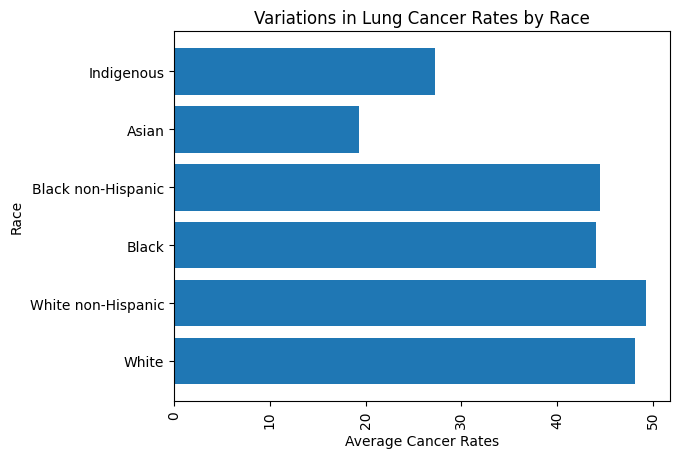

In [57]:
# Select the relevant columns for race-based analysis
race_columns = ['Rates.Race.White', 'Rates.Race.White non-Hispanic',
                'Rates.Race.Black', 'Rates.Race.Asian',
                'Rates.Race.Indigenous', 'Rates.Race.Hispanic']
race_names = ["White", "White non-Hispanic", "Black", "Black non-Hispanic", "Asian", "Indigenous"]
cancer_types = ['Total', 'Lung', 'Breast', 'Colorectal']

# Create a new dataframe with race columns
race_df = df_cancer[race_columns]
cancer_type = "Lung" 
subset_df = df_cancer[[f"Types.{cancer_type}.Race.{race}" for race in race_names]]

# Calculate the average cancer rates for each race
avg_rates = subset_df.mean()

# Plot the average cancer rates by race
plt.barh(race_names, avg_rates.values)
plt.ylabel('Race')
plt.xlabel('Average Cancer Rates')
plt.title('Variations in Lung Cancer Rates by Race')
plt.xticks(rotation=90)
plt.show()

An unexpected founding is that Asian has the lowest average lung cancer rate among the racial group, the bar of this group is much lower than the others.

What is the reason? Genetic, life style, or other reasons?

# Discussion

In terms of the research questions, the analysis has investigated that lung cancer is the leading cause of cancer mortality, and how it varies by state.

For the assumption of **educational attainment**, the data visualization has shown that there is a strong connection between education attainment and the cancer death rate. Ahmedin Jemal, senior vice president of surveillance research at the American Cancer Society, has found that socioeconomic status is more associated with cancer occurrence and mortality. According to Jemal, people with more education are generally less likely to engage in high-risk behaviors such as smoking, obesity, and health insurance. Lung cancer mortality is five times higher in people with low education than in those with high education. Lower socioeconomic groups also have lower access to healthcare, as they lack insurance or the ability to pay, making them less likely to receive preventive services, detect cancer early, and receive appropriate treatment promptly. Additionally, illiteracy is associated with cancer and higher mortality, as people who lack reading skills are less likely to navigate the healthcare system's protections and follow doctors' orders.

For the assumption of **air quality**, the research acknowledges the importance of environmental factors. However, since all states are in the same air quality level, due to the limited data available, it is challenging to assess the influence of air quality on cancer death rates. However, the environmental factor should not be ignored. To further investigate it, incorporating datasets would be beneficial. For example, the dataset of outdoor/indoor air pollution, sunlight, and ionizing radiation.

For the assumption of **an aging population**, the plots also indicate a strong positive correlation between this rate and cancer mortality. According to the American Cancer Society, (ACS), the general rule about cancer risk increases with age. By and large, the biggest contributing risk factor for most cancers is older age. What is more, Union for International Cancer Control (UICC) also reported that as populations age, their risk of developing cancer increases. Research has found that the elderly (defined as people aged 65 years and above) are 11 times more likely to develop cancer, compared to younger people.

For the assumption of **race/ethnicity**, the plot shows racial differences among the race group. The reason is possibly related to the racial difference of lifestyle and ethnic culture. Lifestyle behaviors encompassing diet, physical exercise, sun exposure, smoking, and alcohol use, and sexual practice behaviors. In addition, educational attainment in each race might also be one of the reasons. According to USAFacts’ 2023 State of the Union in Numbers, Asian/Pacific Islander students had the largest high school graduation rates of any race/ethnicity in 2014, 89% followed by white students. Black students had the lowest graduation rates, with less than three-quarters of students starting high school in 2010 and graduating by 2014. The American Cancer Society report also discusses racial differences, which are less important than socioeconomic status. The report estimates that closing the education gap among African Americans if white and black racial differences are excluded, could potentially avoid potentially twice as many premature deaths among those with less education. Cultural factors involve practices, beliefs, and in some instances mistrust of the health care system, which may prevent some from seeking preventive screening services; Genetic factors involve inherited genes and a family history of certain diseases. Overall, to topic of race factor would be more complicated since it is related to many other fields.

In addition, a thing should be mentioned is the absence of categorical data, the dataset does not have data for the age group under 18. Although from the plot we can predict that the rate of this group would be lower than the rate for the group (18-44) and will be close to 0. However, there is a report from Nature, that indicates a fact that nearly half of global childhood cancer cases go undiagnosed. Therefore, childhood cancer should also be a topic we should care about.


### Q3: Any measures that can reduce the cancer death rate?
And after discussion, we can answer the last research question.

Example measures to reduce cancer death rates:

- Public health campaigns and education programs: Develop and implement comprehensive public health campaigns to raise awareness about the importance of cancer prevention, early detection, and healthy lifestyle choices.

- Tobacco control policies: Strengthen tobacco control measures, including increasing taxes on tobacco products, implementing smoke-free policies in public spaces, and expanding access to smoking cessation programs to reduce smoking-related cancers.

- Accessible and affordable healthcare: Improve healthcare systems to ensure equal access to quality cancer screening, early detection, and treatment services, especially for underserved populations.

- Cancer screening programs: Establish and promote cancer screening programs to detect cancer at early stages when it is most treatable. Encourage regular screenings for various types of cancers, such as mammograms for breast cancer and colonoscopies for colorectal cancer.

- Lifestyle interventions: Promote healthy lifestyle choices through community-based programs and initiatives that encourage regular physical activity, healthy eating, and weight management. This can be achieved through interventions designed for schools, workplaces, and community settings.

- Support for high-risk groups: Identify and provide targeted support and resources to high-risk groups, such as those with lower educational attainment, limited access to healthcare, and individuals from disadvantaged socioeconomic backgrounds.

## Conclusion
In conclusion, several measures can be taken to reduce cancer death rates and address the emerging challenges. Firstly, promoting education and literacy can empower individuals to make informed choices and navigate the healthcare system effectively, leading to better prevention and early detection of cancer. Encouraging a healthy lifestyle, encompassing regular exercise, a balanced diet, and the avoidance of high-risk behaviors such as smoking and excessive alcohol consumption, can significantly lower the incidence of cancer. Secondly, achieving equal access to healthcare services is crucial in ensuring that everyone has the opportunity for early detection and timely treatment. By reducing barriers to healthcare, including financial constraints and limited availability of services, we can improve outcomes and reduce cancer mortality rates. Furthermore, considering the impact of socioeconomic factors, such as educational attainment and race, is essential in identifying high-risk groups. Tailored support and interventions should be developed to address the specific needs and challenges faced by these vulnerable populations. By implementing targeted interventions and supporting these individuals, we can make significant strides in reducing cancer disparities and improving overall outcomes.

Overall, the study underscores the importance of addressing socioeconomic disparities to effectively reduce cancer mortality rates. By prioritizing preventive measures, early detection, and targeted support for high-risk groups, society can make substantial progress in combating the burden of cancer and improving overall public health.


## Limitations:

- The baseline dataset is a rather limited dataset. It does not showcase the annual data for each year. Without the measurable time variable, we are not able to analyze the trend of the metadata change over time to have a deeper observation of the dataset. 

- For the same reason, the project has to search for associated datasets that were collected in the same time interval. However, while investigating, some associated datasets found do not collect the data for 2007. The reason is probably that the early Internet technology was not developed, and it was difficult to disseminate information and collect data. This phenomenon illustrates how the digital world is changing traditional research nowadays. 

- A fact was found that while online inquiry, smoke is the biggest risk factor for lung cancer. And there should be a connection between smoke and the risk factors that this study has analyzed. The dataset of the smoke rate might help to have a deeper insight into the relationship among these risk factors. 

## Reference & Source

<div id="refer-anchor-1"></div>

- [1] International Agency for Research on Cancer. *[GLOBOCAN Lung Cancer Facts Sheet 2020](https://gco.iarc.fr/today/data/fact-sheets-cancers)*.

<div id="refer-anchor-2"></div>

- [2] American Cancer Society. *Cancer Facts and Figures 2023*. Atlanta; American Cancer Society: 2023.

<div id="refer-anchor-3"></div>

- [3] Albano, J. D., Ward, E., Jemal, A., Anderson, R., Cokkinides, V. E., Murray, T., Henley, J., Liff, J., & Thun, M. J. (2007). Cancer mortality in the United States by education level and race. Journal of the National Cancer Institute, 99(18), 1384–1394. https://doi.org/10.1093/jnci/djm127

<div id="refer-anchor-4"></div>

- [4] Oakes, K. Elizabeth. “Nearly Half of Global Childhood Cancer Cases Go Undiagnosed.” Nature, March 13, 2019. https://doi.org/10.1038/d41586-019-00828-0.

<div id="refer-anchor-5"></div>

- [5] Manisalidis I, Stavropoulou E, Stavropoulos A, Bezirtzoglou E. Environmental and Health Impacts of Air Pollution: A Review. Front Public Health. 2020 Feb 20;8:14. doi: 10.3389/fpubh.2020.00014. PMID: 32154200; PMCID: PMC7044178.

<div id="refer-anchor-6"></div>

- [6] National Cancer Institute. “Risk Factors: Age,” March 5, 2021. https://www.cancer.gov/about-cancer/causes-prevention/risk/age.


<div id="refer-anchor-7"></div>

- [7] UICC. “Cancer and Ageing | UICC,” n.d. https://www.uicc.org/what-we-do/areas-focus/cancer-and-ageing#:~:text=Research%20has%20found%20that%20the,over%20the%20next%20two%20decades.


<div id="refer-anchor-8"></div>

- [8] USAFacts. “Three Charts on US Education Levels by Race and Ethnicity.” USAFacts, June 29, 2023. https://usafacts.org/articles/three-charts-that-explain-american-education-levels/#:~:text=Key%20takeaway%3A%20Asian%2FPacific%20Islander,2010%20and%20graduating%20by%202014.